<a href="https://colab.research.google.com/github/prachi732/Finance/blob/master/Forecasting_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [0]:
ticker='PG'
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2007-1-1')['Adj Close']

In [0]:
log_returns=np.log(1+data.pct_change())

In [7]:
log_returns.tail()

,PG
Date,
2020-06-01,0.011408
2020-06-02,0.006885
2020-06-03,0.003973
2020-06-04,-0.021145
2020-06-05,0.019456


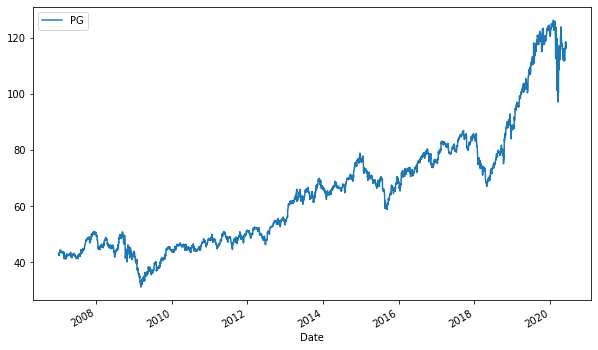

In [20]:
data.plot(figsize=(10,6))

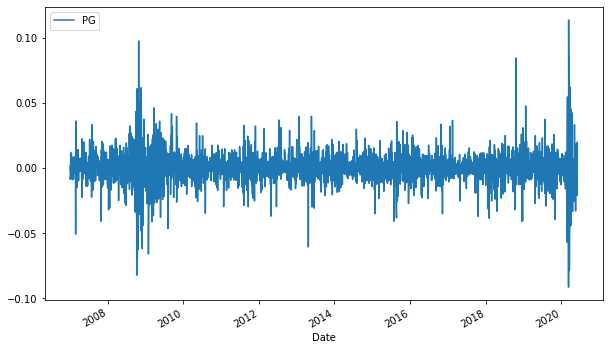

In [21]:
log_returns.plot(figsize=(10,6))

In [22]:
u=log_returns.mean()
u

PG    0.000299
dtype: float64

In [24]:
var=log_returns.var()
var

PG    0.000143
dtype: float64

drift=u-1/2.*var*

u=mean log return

In [25]:
drift=u-(0.5*var)
drift

PG    0.000227
dtype: float64

In [26]:
stdev=log_returns.std()
stdev

PG    0.011969
dtype: float64

In [27]:
np.array(drift)

array([0.00022694])

In [28]:
np.array(stdev)

array([0.01196883])

In [29]:
norm.ppf(0.95)

1.6448536269514722

In [30]:
x=np.random.rand(10,2)
x

array([[0.72063194, 0.74111566],
       [0.51689015, 0.13402698],
       [0.94953686, 0.83833977],
       [0.12482057, 0.83298447],
       [0.81350189, 0.78630611],
       [0.45117   , 0.50662049],
       [0.63280032, 0.9413878 ],
       [0.75650184, 0.72712337],
       [0.98170576, 0.30032747],
       [0.71055253, 0.94459253]])

In [31]:
norm.ppf(x)

array([[ 0.58471981,  0.64678874],
       [ 0.04234999, -1.10755522],
       [ 1.64037956,  0.98765742],
       [-1.15122144,  0.96602623],
       [ 0.89087501,  0.79366963],
       [-0.1227059 ,  0.01659588],
       [ 0.33927928,  1.56653083],
       [ 0.69509411,  0.60413595],
       [ 2.09032645, -0.52345891],
       [ 0.55499959,  1.59454087]])

In [33]:
z=norm.ppf(np.random.rand(10,2))
z

array([[-0.04271961,  0.34095243],
       [ 1.31122595, -0.26770984],
       [-0.67023772, -1.90835552],
       [-1.27738237,  1.20798841],
       [ 0.45927068, -0.67053035],
       [ 0.09567992, -1.28997997],
       [-0.96438847, -0.14796958],
       [ 0.0919016 ,  0.00631792],
       [ 2.11413147,  0.88491187],
       [-2.0277847 ,  0.93731026]])

In [0]:
t_intervals=1000
iterations=10

In [0]:
daily_returns=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))

In [36]:
daily_returns

array([[0.99791124, 1.0196414 , 1.00647609, ..., 1.02746092, 0.9960764 ,
        1.02631063],
       [0.99731467, 1.00612523, 1.01076085, ..., 0.98658209, 1.00199618,
        1.01736558],
       [1.02968264, 0.98577143, 0.98244427, ..., 1.00732564, 1.01242835,
        0.95801435],
       ...,
       [0.99014804, 1.00114051, 1.00828336, ..., 1.01018331, 0.99561621,
        1.02681214],
       [0.99954951, 1.02894026, 0.98580605, ..., 0.99701045, 1.00176257,
        0.98703008],
       [1.01625649, 0.99259954, 0.99227875, ..., 1.00024103, 0.99132525,
        0.99087548]])

In [38]:
S0=data.iloc[-1]
S0

PG    118.330002
Name: 2020-06-05 00:00:00, dtype: float64

In [0]:
price_list=np.zeros_like(daily_returns)

In [41]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
price_list[0]=50
price_list

array([[50., 50., 50., ..., 50., 50., 50.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [0]:
for t in range(1,t_intervals):
  price_list[t]=price_list[t-1]*daily_returns[t]

In [46]:
price_list

array([[ 50.        ,  50.        ,  50.        , ...,  50.        ,
         50.        ,  50.        ],
       [ 49.86573351,  50.30626152,  50.53804238, ...,  49.32910461,
         50.09980909,  50.86827894],
       [ 51.3458802 ,  49.59047536,  49.65081019, ...,  49.69047211,
         50.72246696,  48.73254094],
       ...,
       [ 90.87914066, 101.48627928,  72.74244244, ...,  61.77816014,
         44.36617074,  57.41210786],
       [ 90.83820048, 104.42331907,  71.7099396 , ...,  61.59347144,
         44.4443693 ,  56.66747757],
       [ 92.31491078, 103.65053894,  71.15624954, ...,  61.60831711,
         44.05882569,  56.15041388]])

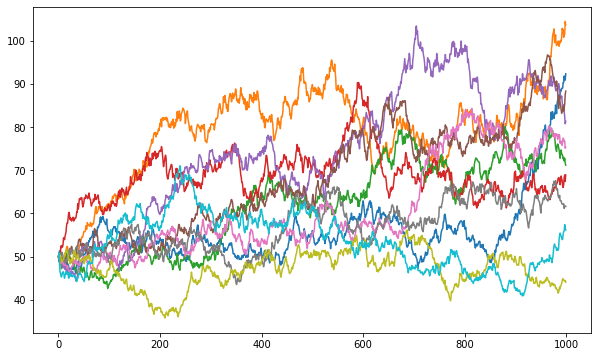

In [47]:
plt.figure(figsize=(10,6))
plt.plot(price_list)